***

<div align="center">

## Assignment 2 weather

</div>

***

Import nessesary packages

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

Load the data

In [65]:
# load weatherreadings1.csv

dfweather=pd.read_csv("weatherreadings1.csv")


Show general information about the dataset, including column names, non-null counts, and data types

In [66]:

dfweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

Provide an example of the data that will be used for plotting

In [67]:

dfweather[["reportStartDateTime", "dryBulbTemperature_Celsius"]].sample(2)

,reportStartDateTime,dryBulbTemperature_Celsius
0,2024-10-02T16:15:00+00:00,15.944444
77,2024-10-03T12:15:00+00:00,14.500000


Create a scatter plot showing temperature changes over time

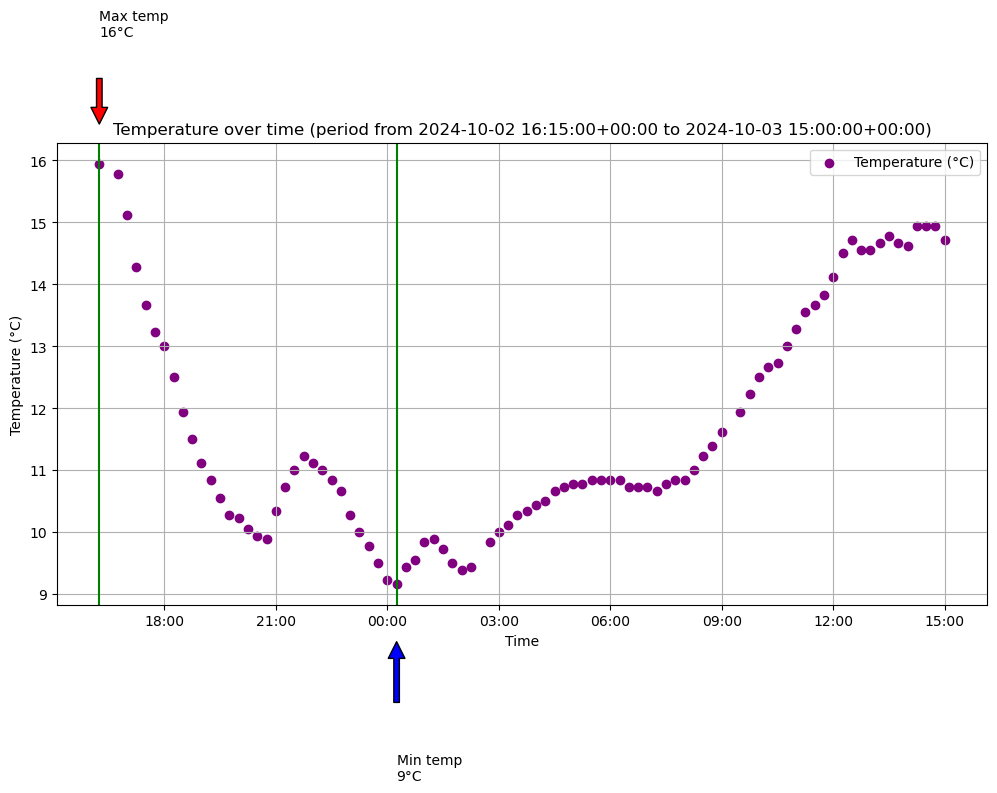

In [69]:

# convert the time column to datetime format
dfweather["reportStartDateTime"] = pd.to_datetime(dfweather["reportStartDateTime"])

# get the start and end dates for the title
start_date, end_date = dfweather["reportStartDateTime"].min(), dfweather["reportStartDateTime"].max()

# find the largest and smallest temperature in the dataset (whole numbers)
max_temp = round(dfweather["dryBulbTemperature_Celsius"].max())  
min_temp = round(dfweather["dryBulbTemperature_Celsius"].min()) 

# get the corresponding times for the largest and smallest temperatures
max_temp_time = dfweather.loc[dfweather["dryBulbTemperature_Celsius"] == dfweather["dryBulbTemperature_Celsius"].max(), "reportStartDateTime"].values[0]
min_temp_time = dfweather.loc[dfweather["dryBulbTemperature_Celsius"] == dfweather["dryBulbTemperature_Celsius"].min(), "reportStartDateTime"].values[0]

# plot the data with time on the x-axis
plt.figure(figsize=(12, 6))
plt.scatter(dfweather["reportStartDateTime"], dfweather["dryBulbTemperature_Celsius"], label="Temperature (°C)", color="purple")

# add vertical lines for the maximum and minimum temperature
plt.axvline(x=max_temp_time, color="green", linestyle="-")
plt.axvline(x=min_temp_time, color="green", linestyle="-")

# annotate the maximum temperature
plt.annotate(f"Max temp\n{max_temp}°C", xy=(max_temp_time, max_temp), 
             xytext=(max_temp_time, max_temp + 2), 
             arrowprops=dict(facecolor="red", shrink=0.3))

# annotate the minimum temperature
plt.annotate(f"Min temp\n{min_temp}°C", xy=(min_temp_time, min_temp), 
             xytext=(min_temp_time, min_temp - 3), 
             arrowprops=dict(facecolor="blue", shrink=0.3))

# Format x-axis to show only the time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# add labels and title to the plot
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperature over time (period from {start_date} to {end_date})")
plt.grid(True)

plt.legend(loc="upper right")

# Show 
plt.show()

***

### END

***